#What is Feature Selection?

+ Selecting the top most relevant features or columns out of total columns available in the dataset to make more your model efficient & accurate.

+ importance:

  - **curse of dimensianility** bcoz model performs better with lesser features bcoz of concept called sparsity
  - **computational complexity** with lesser data it will be faster
  - **interpretibility complexity** inference will be complex when dealing with higher no. of features
  - **If you have a data with lesser no of columns already then there is no need to do feature selection**

#Techniques

1. Filter based: statistically stuyding each filter independently & select features on the basis of thier scores.
  - Duplicate Features
  - variance threshold
  - corelation
  - anova
  - chisquare
  - mutual informaiton


2. Wrapper techniques

3. Embedded techniques

4. Hybrid techniques

#Base Accuracy

+ Lets apply Logistic regression on model with all features so that we can compare it with accuracy after performing feature selection & less no of columns

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

FileNotFoundError: ignored

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

In [ ]:
#currently there are 563 columns

In [ ]:
df['Activity'].value_counts()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features and target
X = df.drop('Activity', axis=1)
y = df['Activity']

# Encode target labels
# perform transformation before splitting data
le = LabelEncoder()
y = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

In [ ]:
#test accuracy coming out to be as .098
#we'll now apply feature selection techniques & reduce the shape to lesser no. columns
#retest the accuracy to prove assumptions that model will have .= accuracy as earlier

#** Feature Selection Techniques **

#Filter-based Techniques

##Remove Duplicate Features

+ before starting feature selection, remove dupicate features if any

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
X_train = X_train.loc[:, ~X_train.T.duplicated(keep='first')]
X_test = X_test.loc[:, ~X_test.T.duplicated(keep='first')]

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
#we've already removed some of the duplicate columns & now the shape is reduced to 541

##Variance Threshold method

+ If we have any of these 2 types of features then use Variance Threshold Method

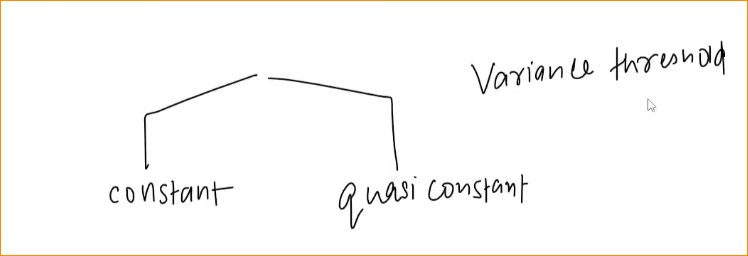

+ constant feature: If all the values of any column's remain constant/unchanged, means there is no variance, means there is no variation in that column to explain the variance in target column, thats why we drop such columns.

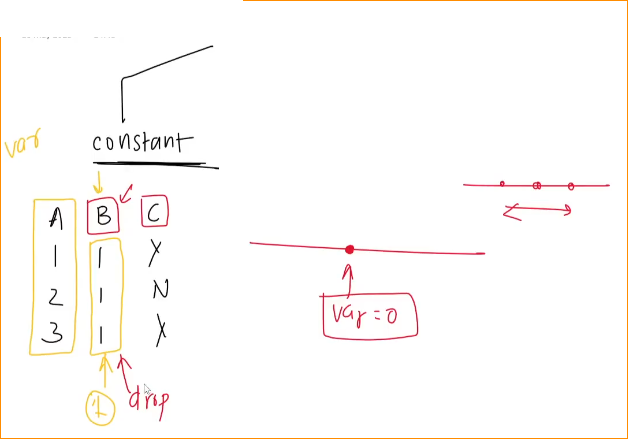

+ quassi constant features: for ex: if there are 1000 rows in a feature, where 995 rows value is 1 & 5 rows value is 0. we can say that variance is very close to 0 & it will not help much in predicting the target column bcoz there is no variety.

+ To drop these types of features, we use **"variance threshold method"** where we decide a threshold variance & then we find the variance of each columns & at last we check for all the columns whose variance is less then threshold variance & we drop those features.



In [ ]:
#before applying variance threshold bring all cols in same scale, standardize or normalize
#bcoz if scale will be different then same threshold value will not help
#setting threshold b/w 0.1 to 0.01 is a good strategy

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)

In [ ]:
sel.fit(X_train)

In [ ]:
#to view all columns status whether above thresold or not
#it will return into a boolean df

sum(sel.get_support())

In [ ]:
#to get all cols using np masking

columns = X_train.columns[sel.get_support()]

In [ ]:
columns

In [ ]:
#dropping cols

X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
#now shape has reduced further to 360 from 563

### You cant apply variance threshold everytime !!

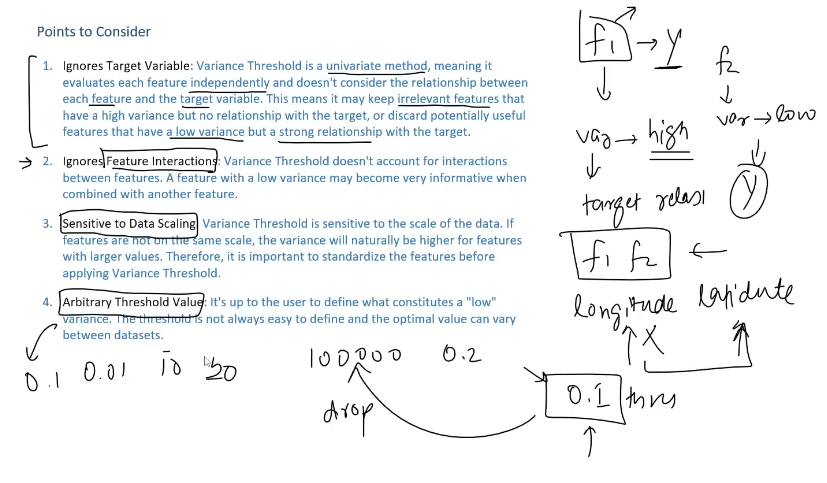

##Correlation (Pearson correlation coefficient)

+ In this technique we pick 1 column 1 by 1 from all the input columns & target column

+ find df.corr() which ranges b/w -1 to 1

+ -1 represents strong negative inverse relationship & +1 represents strong positive linear relationship

+ if o then there is no linear relationship

+ lets assume we have f1, f2, f3.... fn columns & y is the target column

+ we'll find the corelation of all columns with y

+ we'll decide a threshold, if corelation is below that threshold then we'll remove those columns else we'll keep those columns

+ another approach could be, we'll find corection b/w all columns & see if multi-colinearity exists in the data & remove highly corelated columns

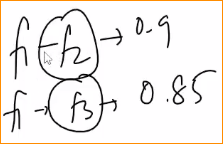

+ mostly we try to reduce multi colinearity & automatically feature size reduces



###code implimentation

+ find corelation coefficient b/w 2 columns for all columns 1 by 1
+ if any 2 columns have corelation coefficient > 0.95 then drop 1 of the column

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(X_train.corr())

In [ ]:
corr_matrix = X_train.corr()
corr_matrix

In [ ]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])

print(len(columns_to_drop))

In [ ]:
# the reason why it shows more no of columns even though we have 360 remaining columns
# is that each column is checking corelation with each columns so there's a repeatation

In [ ]:
columns_to_drop = set(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
#feature size further reduced to 156 from 360

###Disadvantages

+ when removing features on the basis of corelation, we might remove columns which have non-linear relationship with target

+ it doesnt capture complex relationship for ex: may be 1-1 columns doesnt have strong linear relationship but when compared with 1-1-1 then it shares a strong linear relation with target like housing dataset

+ 0.95 is not the optimum threshold, it depends on the data

+ this method is sensitive to outliars so we need to remove them in the pre-processing step

## ANOVA Test


+ In hypotheis testing, we come to a conclusion on population dataset based on sample dataset

+ We'll divide into Null & Alternate Hypothesis & collect evidences

+ Apply different techniques (ANOVA, Chi-Square, T-test) & find out whether Null hypothesis is true or Alternate hypothesis is True

+ If the p-value (significance value) comes out to be less then 0.05 then we'll reject Null hypothesis & accept alternate hypothesis

+ - when you have 1 categorical feature, apply: 1-sample proportion test
  - when you have 2 categorical feature, apply: chi-square test
  - when 1 numerical feature, apply: T-test
  - when 2 numerical features, apply: co-relation (value ranges -1 to 1), If it comes out to be 0 or close to 0 then we'll reject alternate & accept null hypothesis
  - when categorical with more more then 2 categories & numerical features, apply: ANOVA test

In [ ]:
# https://www.youtube.com/watch?v=YrhlQB3mQFI

In [ ]:
# https://www.youtube.com/watch?v=iZ2r7aIwMbc&list=PLmPJQXJiMoUU52xCfjyoGRfoLCHKFtDxX

+ In ANOVA test, we calculate "f-ratio/f-statistics" & plot that value on f-distribution curve & find p-value.

+ If p-value is < 0.05 then we'll reject null hypothesis which says "there is no relationship b/w that column f & target y" but since we reject that hypothesis it means there is a relationship..

+ to calculate f-statistics: we need to SSW & SSB like below:

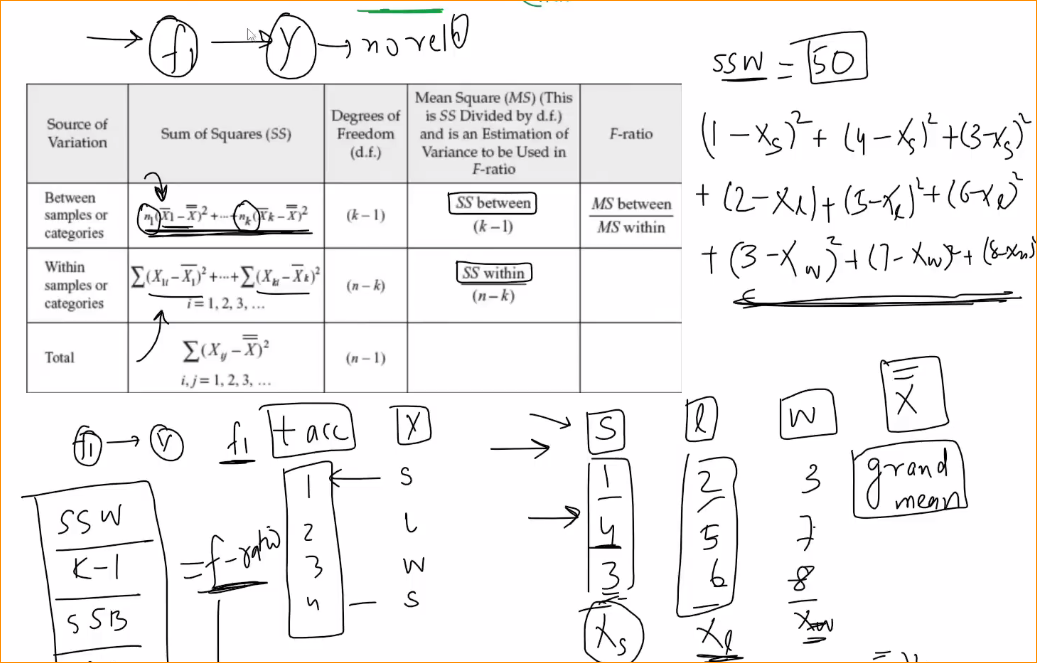

###Code implimentation

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
sel = SelectKBest(f_classif, k = 100).fit(X_train, y_train)

NameError: ignored

In [ ]:
#display selected feature names
X_train.columns[sel.get_support()]

In [ ]:
columns = X_train.columns[sel.get_support()]

In [ ]:
#filtering 100 best columns out of all
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train = pd.DataFrame(X_train, columns = columns)
X_test = pd.DataFrame(X_test, columns = columns)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
#shape further reduced to 100 features after applying ANOVA

###Disadvantages

1. Assumptions of normality: ANOVA asumes that data for each group follows normal distribution

2. Assumptions of homogenity of variance: ANOVA asumes that variance of all groups is roughly same

3. Independence of observation: ANOVA asumes that observations (each row) are independent from each other thats why we dont apply ANOVA on time series data becoz those rows are auto co-related

4. Sensitive to outliars

5. It check the relation b/w each column & target variable but it doesnt check the relation b/w columns together


##MOMENT OF TRUTH: Applying Logistic regression again on reduce shaped data

+ earlier the shape was 563, now its reduced to 100

In [ ]:
#initialize & train LR
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)


#make predictions on test set
y_pred = log_reg.predict(X_test)


#calculate & print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

In [ ]:
#Its still coming out to be 100 after reducing the shape

##Chi-Square Test

+ Chi-Square tells the relationship b/w input & output column
+ where both columns are categorical


In [ ]:
titanic = pd.read_csv("/content/titanic_train.csv")[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

+ we have to find if there's a relation b/w sex & survived
+ if there's a relation then we'll keep it else w1e'll drop
+ we'll repeat the same for all the other columns

In [ ]:
ct = pd.crosstab(titanic['Survived'], titanic['Sex'], margins=True)
ct

+ 1st make a ct b/w 2 columns (observed value)
+ make another table called expected value which show how many ideally should survived by multiplying all to all / all
+ we'll study both table's difference & if its crazily different then those 2 columns are related bcoz in chi-square test null hypothesis says there's no relation but since variation in 1 effects another, it shows they are related
+ calculate chi-square statistics = (observed value - expected value)^2 / expected_value.. repeat for other observed values

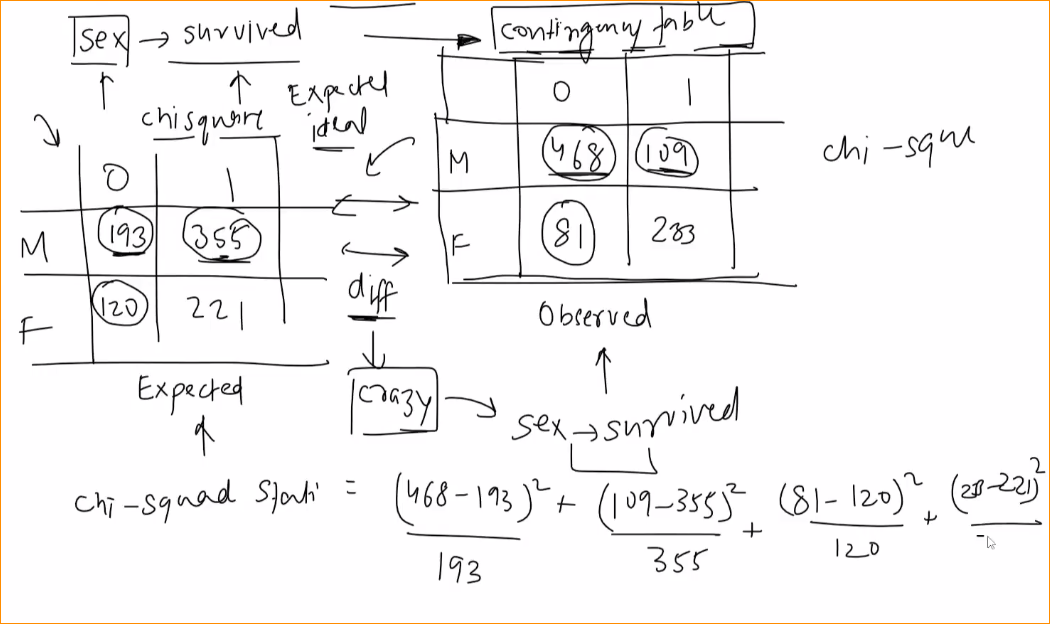

+ whe we solve this equation, we get a number called chi-square statistics which follows chi-square distribution

+ we plot it & calculate p-value

+ if its less then 0.05  then we reject null hypothesis as it means difference is crazy

+ at end, few columns will be removed so we use k_best




### code implimentation

In [ ]:
from scipy.stats import chi2_contingency

chi2_stat, p_val, dof, expected = chi2_contingency(ct)

# Print the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of Freedom:", dof)
print("Expected Values:")
print(expected)

In [ ]:
#smaller the p-value, important is the feature

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

score = []
for feature in titanic.columns[:-1]:  # Assuming the last column is the target variable 'Survived'
    ct = pd.crosstab(titanic['Survived'], titanic[feature])

    # Perform chi-square test on the entire contingency table
    chi2_stat, p_value, dof, expected = chi2_contingency(ct)

    score.append(p_value)

In [ ]:
pd.Series(score, index=titanic.columns[:-1]).sort_values(ascending=True).plot(kind='bar')

###another approach

+ In this approach we'll have to first transform categories into numbers

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

In [ ]:
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

In [ ]:
X = titanic_encoded.drop('Survived', axis = 1)
y = titanic_encoded['Survived']

In [ ]:
#calculate chi-sqr stats
chi_scores = chi2(X,y)

In [ ]:
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace=True)

In [ ]:
p_values.plot.bar()

### Disadvantages

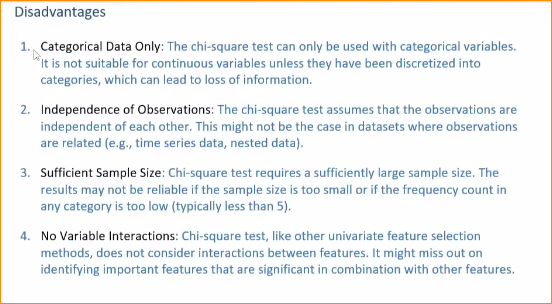

##Advantages & Dis-advantages of Filter based techniques

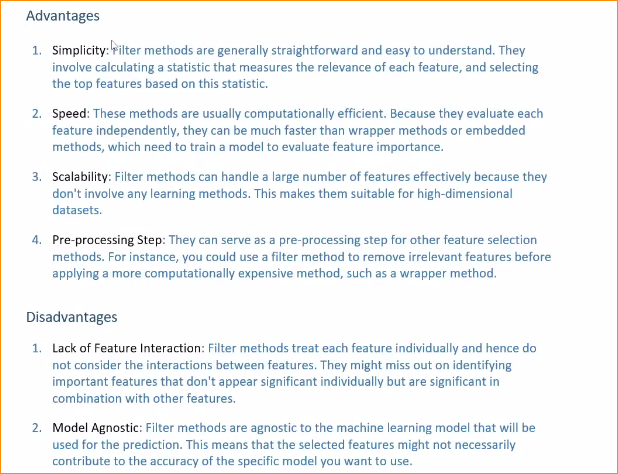

##Task

### `Task` Do feature selection as per metods taught is session 54 on SECOM dataset.

Dataset Link : https://archive.ics.uci.edu/ml/datasets/SECOM

Drive Link : https://docs.google.com/spreadsheets/d/1dFCe1zgokabsiEr6BbWmMJtiMefkrChpJWLiG_0dDkk/edit?usp=share_link

In [ ]:
# Write your Code here

### `Solution`

In [ ]:
import pandas as pd

DATA = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv")

DATA.info()

In [ ]:
DATA.head()

In [ ]:
# Logistic Model Before Feature Selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dropping Time column
data = DATA.drop('Time', axis=1)

# Filling NaN Values with random
for column in data.columns:
    # print("Column- ", column)
    # Get the minimum and maximum values of the column
    min_value = data[column].min()
    max_value = data[column].max()

    # Generate random numbers within the range
    random_values = np.random.uniform(min_value, max_value, size=data[column].isnull().sum())

    # Create a Series with the random values
    random_series = pd.Series(random_values, index=data[column][data[column].isnull()].index)

    # Fill NaN values with the random series
    data[column].fillna(random_series, inplace=True)

    # Print
    # print(data[column].isnull().sum())


# data.isnull().sum()

In [ ]:
# Separate features and target
X = data.drop('Pass/Fail', axis=1)
y = data['Pass/Fail']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=10000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

To perform filter-based feature selection on the "UCI SECOM" dataset, which has 592 columns and a target column called "Pass/Fail," we can utilize the following methods:

1. Duplicate Features:
   - Identify and remove duplicate columns from the dataset. Columns with identical values provide redundant information and do not contribute to the prediction task.

2. Variance Threshold Method:
   - Calculate the variance of each feature.
   - Remove features with low variance, as they tend to have little or no predictive power.
   - Set a threshold value for variance and remove features below that threshold.

3. Correlation:
   - Compute the correlation matrix of the features.
   - Identify highly correlated features and choose one from each highly correlated group.
   - High correlation between features indicates redundancy, and removing one from each correlated group helps reduce multicollinearity.

4. ANOVA (Analysis of Variance):
   - Perform an ANOVA test between each feature and the target variable ("Pass/Fail").
   - Select features with a significant impact on the target variable.
   - Set a significance level (e.g., p-value threshold) for the test to determine the importance of each feature.

5. Chi-Squared:
   - Apply the Chi-Squared test between each feature and the target variable, considering both features as categorical.
   - Select features with a significant association with the target variable.
   - Set a significance level (e.g., p-value threshold) to determine the importance of each feature.

Implementing these feature selection methods in Python using the "UCI SECOM" dataset can be done as follows:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from scipy.stats import pearsonr

data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQtBXo5cBnDsM2fmfHPm6u72KGUS5FjPHNGMxOfYjA9-CAhmnRpwkIw_rOR3sANJIToiUU__6fbBvig/pub?gid=572763137&single=true&output=csv"

# Load the dataset
DATA = pd.read_csv(data_path)  # Replace with the actual filename and path

# Remove duplicate features
# Get the subset of columns with duplicate values
duplicated_cols = DATA.columns[DATA.T.duplicated()]

# Remove the duplicated columns
data = DATA.drop(columns=duplicated_cols)

# Drop time column
data.drop('Time', inplace=True, axis=1)


# Numbers Of Columns after removing Duplicate columns
print("Number of Columns - ", DATA.shape[1])
print("Number of Columns after removing duplicate columns- ", data.shape[1])


In [ ]:
# Variance Threshold Method
selector = VarianceThreshold(threshold=0.01)
sel = selector.fit(data)

columns = data.columns[sel.get_support()]

data_vt = sel.transform(data)

data_vt = pd.DataFrame(data_vt, columns=columns)

# Numbers Of Columns after Variance Threshold Method

print("Number of Columns after Variance Threshold Method- ", data_vt.shape[1])

In [ ]:
# Correlation
corr_matrix = data_vt.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
data_corr = data_vt.drop(to_drop, axis=1)

# Numbers Of Columns after Variance Threshold Method

print("Number of Columns after Correlation- ", data_corr.shape[1])

In [ ]:
data_corr.info()

In [ ]:

# ANOVA - Approach showed in the session can't be done here
#  every rows of the dataset have some NaN values.
# ANOVA can't be applied on data having NaN values.


We can still perform ANOVA analysis by considering each column separately.

ANOVA can be applied to each column individually, comparing the target variable which is Pass/Fail column in our case against the non-missing values in that specific column.

We will drop NaN values of each column before performing the ANOVA

In [ ]:
from scipy.stats import f_oneway

# Significance Value
alpha = 0.05

# Columns haveing p_value less than alpha
column_pvalues = []

# Iterate over each column
for column in data_corr.iloc[:, :-1].columns:
    # Extract the non-missing values in the column
    column_data = data_corr[column].dropna()

    # Perform ANOVA with the target variable
    anova_result = f_oneway(column_data, data_corr['Pass/Fail'])

    # Print the ANOVA result or perform further analysis
    print(f"Column: {column} - ANOVA p-value: {anova_result.pvalue}")

    if anova_result.pvalue <= alpha:
        column_pvalues.append((column, anova_result.pvalue))

# Selecting best 100 Features - lower p-value better feature
# Sort the column p-values in ascending order
column_pvalues.sort(key=lambda x: x[1])

# Select the top 100 columns with the lowest p-values
selected_columns = [column for column, _ in column_pvalues[:100]]

data_anova = data_corr[selected_columns+['Pass/Fail']]

print("Number of Columns after Correlation- ", data_anova.shape[1])

In [ ]:
# Chi-Squared
# -> Our Data is Numerical so chi-squared can't be done.

In [ ]:
# Shape of Data after Feature Selection

print("Shape - ", data_anova.shape)

# Filling NaN Values with random
for column in data_anova.columns:
    # print("Column- ", column)
    # Get the minimum and maximum values of the column
    min_value = data_anova[column].min()
    max_value = data_anova[column].max()

    # Generate random numbers within the range
    random_values = np.random.uniform(min_value, max_value, size=data_anova[column].isnull().sum())

    # Create a Series with the random values
    random_series = pd.Series(random_values, index=data_anova[column][data_anova[column].isnull()].index)

    # Fill NaN values with the random series
    data_anova[column].fillna(random_series, inplace=True)

    # Print
    # print(data[column].isnull().sum())


# Separate features and target
X = data_anova.drop('Pass/Fail', axis=1)
y = data_anova['Pass/Fail']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)


# Initialize and train logistic regression model
log_reg = LogisticRegression(max_iter=10000)  # Increase max_iter if it doesn't converge
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate and print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

## Mutual Information

+ It evaluates the relationship between a feature and the target variable. It measures how much information about the target variable can be obtained from the feature.

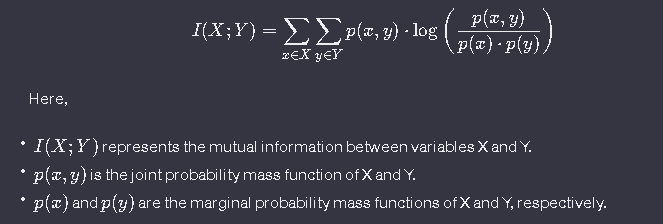

+ In order to find P(x,y), p(x) & p(y)

+ We'll create a contingency table

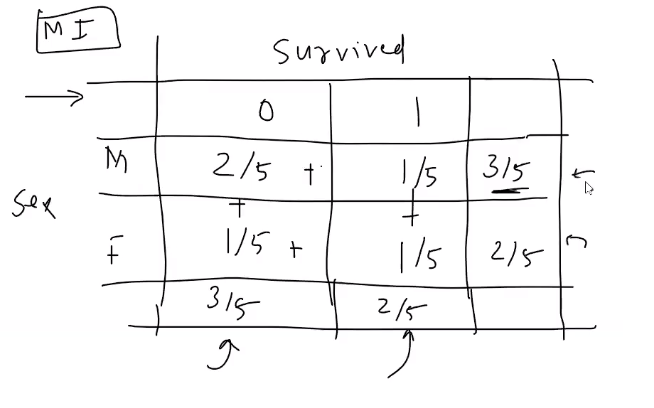

+ Now applying formula by using these values:

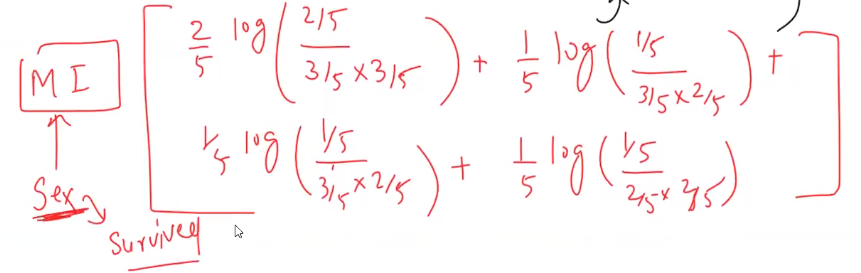

+ MI will be higher when joint probabiity will be more & lower when independent probability will be lower

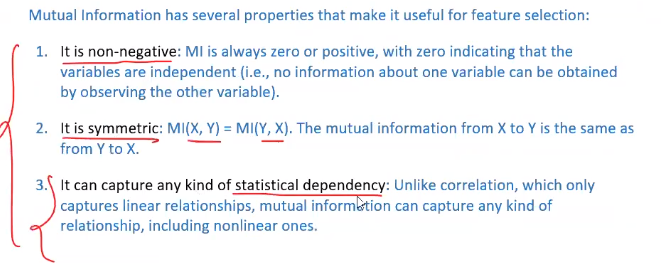





In [5]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Compute mutual information
mi = mutual_info_classif(X, y)

# Print mutual information
for i, mi_value in enumerate(mi):
    print(f"Feature {i}: Mutual Information = {mi_value}")


Feature 0: Mutual Information = 0.5108666588557069
Feature 1: Mutual Information = 0.2623437186767221
Feature 2: Mutual Information = 0.9833320470444398
Feature 3: Mutual Information = 0.9903327959864063


In [7]:
#can also be used iwth kbest

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']

# Create SelectKBest feature selector
selector = SelectKBest(mutual_info_classif, k=2)

# Fit and transform
X_new = selector.fit_transform(X, y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)

print(iris.feature_names)
print(cols)


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[2 3]


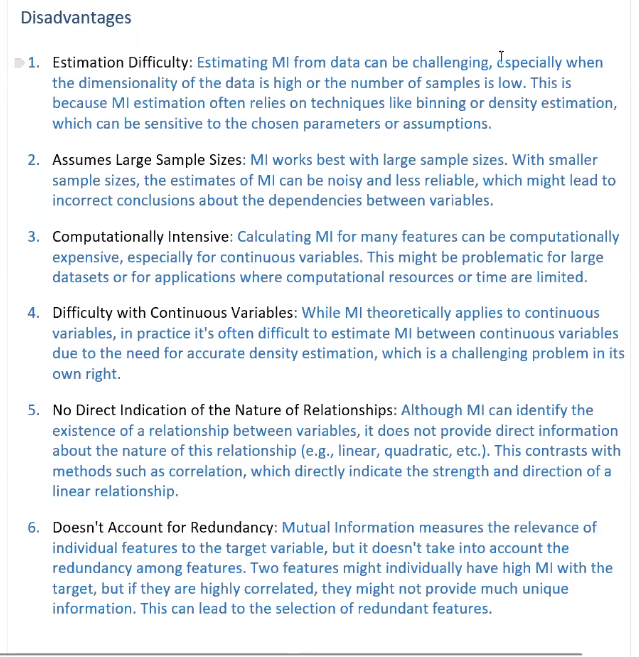

#Wrapper techniques

+ Filter techniques compare one column at a time to the target, ignoring relationships between multiple columns like latitude and longitude. Wrapper methods fix this by considering these relationships, making the analysis more meaningful.

+ Wrapper methods involve creating groups of different features, like f1, f2, f3... and the target (let's call it 'y'). For instance, if we have f1, f2, f3, f4, and y, we'd make subsets like (f1, f2, y), (f2, f3, y), (f3, f4, y), and so on.

  Then, we use a machine learning algorithm on these subsets to measure their performance. This helps us find which combination of features gives the best result in terms of accuracy or how well it predicts the outcome. The combination that works best will be the most important features

+  subsets can contain any number of input features together. They're not limited to just two features; they can include multiple features combined with the target variable. These subsets can consist of various combinations, including two features, three features, or more, depending on what works best for the analysis.






In [ ]:
from itertools import combinations

# List of feature names
features = ['f1', 'f2', 'f3', 'f4']

# Generate subsets of different lengths
subsets = []
for L in range(1, len(features)+1):
    for subset in combinations(features, L):
        subsets.append(subset)

# Print subsets
for subset in subsets:
    print(subset)


##Type of wrapper technique

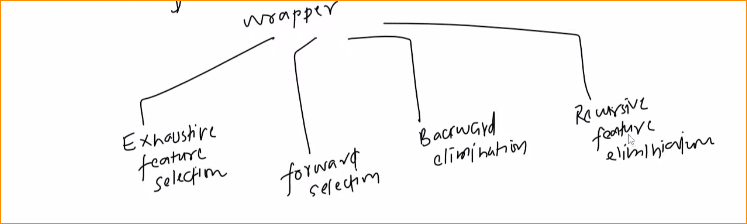

##Exhaustive feature selection / best subset selection

+ exhaustive feature selection is a method where you try out every possible combination of features (or variables) to figure out which combination gives the best performance for a particular machine learning model. It involves evaluating all possible subsets of features to find the one that optimizes the model's performance based on certain criteria, such as accuracy or predictive power. However, this method can be computationally intensive and may not be practical for datasets with a large number of features.

+ 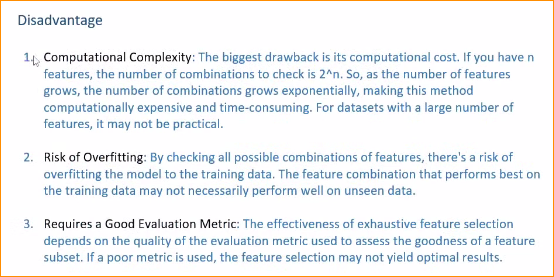

##code implimentation

###1

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import cross_val_score

In [ ]:
!pip install --upgrade scikit-learn mlxtend

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

lr = LogisticRegression()

sel = EFS(lr, max_features=4, scoring='accuracy', cv=5)

+ cross validation

+
In machine learning, cross-validation is a technique used to assess how well a model generalizes to new, unseen data. Imagine you have a dataset you're using to train a model. Instead of just using all of it to train and hoping the model works well on any new data, you split the dataset into multiple parts (called "folds"). You train the model on a subset of the data and then test it on the remaining part.

  This process is repeated multiple times, each time using a different subset for training and testing. It helps to simulate how the model might perform on different unseen data samples. By averaging the performance across these different splits, you can get a more reliable estimate of the model's performance and how well it might work on new, unknown data.

In [ ]:
model = sel.fit(df.iloc[:,:4],df['species'])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
model.best_score_

0.9733333333333334

In [ ]:
model.best_feature_names_

('sepal_width', 'petal_length', 'petal_width')

In [ ]:
# detailed output
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.73333333, 0.76666667, 0.76666667, 0.83333333]),
  'avg_score': 0.7533333333333333,
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.56666667, 0.53333333, 0.53333333, 0.63333333]),
  'avg_score': 0.5599999999999999,
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 1.        , 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.9533333333333334,
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 0.96666667, 0.9       , 0.93333333, 1.        ]),
  'avg_score': 0.96,
  'feature_names': ('petal_width',)},
 4: {'feature_idx': (0, 1),
  'cv_scores': array([0.73333333, 0.83333333, 0.76666667, 0.86666667, 0.9       ]),
  'avg_score': 0.8200000000000001,
  'feature_names': ('sepal_length', 'sepal_width')},
 5: {'feature_idx': (0, 2),
  'cv_scores': array([0.93333333, 1.        , 0.9   

In [ ]:
metric_df = pd.DataFrame.from_dict(model.get_metric_dict()).T
metric_df

feature_idx                                          cv_scores avg_score  \
0           (0,)  [0.6666666666666666, 0.7333333333333333, 0.766...  0.753333   
1           (1,)  [0.5333333333333333, 0.5666666666666667, 0.533...      0.56   
2           (2,)  [0.9333333333333333, 1.0, 0.9, 0.9333333333333...  0.953333   
3           (3,)  [1.0, 0.9666666666666667, 0.9, 0.9333333333333...      0.96   
4         (0, 1)  [0.7333333333333333, 0.8333333333333334, 0.766...      0.82   
5         (0, 2)  [0.9333333333333333, 1.0, 0.9, 0.9333333333333...  0.953333   
6         (0, 3)  [0.9333333333333333, 0.9666666666666667, 0.933...  0.953333   
7         (1, 2)  [0.9333333333333333, 1.0, 0.9, 0.9333333333333...  0.953333   
8         (1, 3)  [0.9333333333333333, 0.9666666666666667, 0.9, ...      0.94   
9         (2, 3)  [0.9666666666666667, 0.9666666666666667, 0.933...      0.96   
10     (0, 1, 2)  [0.9333333333333333, 1.0, 0.9, 0.9333333333333...  0.953333   
11     (0, 1, 3)  [0.9, 0.9666666666666667, 0.9333333333333333, ...  0.946667   
12     (0, 2, 3)  [0.9666666666666667, 0.9666666666666667, 0.933...  0.966667   
13     (1, 2, 3)  [0.9666666666666667, 1.0, 0.9333333333333333, ...  0.973333   
14  (0, 1, 2, 3)  [0.9666666666666667, 1.0, 0.9333333333333333, ...  0.973333   

                                        feature_names  ci_bound   std_dev  \
0                                     (sepal_length,)  0.069612   0.05416   
1                                      (sepal_width,)  0.049963  0.038873   
2                                     (petal_length,)  0.051412      0.04   
3                                      (petal_width,)  0.049963  0.038873   
4                         (sepal_length, sepal_width)  0.079462  0.061824   
5                        (sepal_length, petal_length)  0.051412      0.04   
6                         (sepal_length, petal_width)  0.034274  0.026667   
7                         (sepal_width, petal_length)  0.051412      0.04   
8                          (sepal_width, petal_width)  0.032061  0.024944   
9                         (petal_length, petal_width)  0.032061  0.024944   
10          (sepal_length, sepal_width, petal_length)  0.051412      0.04   
11           (sepal_length, sepal_width, petal_width)  0.043691  0.033993   
12          (sepal_length, petal_length, petal_width)  0.027096  0.021082   
13           (sepal_width, petal_length, petal_width)  0.032061  0.024944   
14  (sepal_length, sepal_width, petal_length, peta...  0.032061  0.024944   

     std_err  
0    0.02708  
1   0.019437  
2       0.02  
3   0.019437  
4   0.030912  
5       0.02  
6   0.013333  
7       0.02  
8   0.012472  
9   0.012472  
10      0.02  
11  0.016997  
12  0.010541  
13  0.012472  
14  0.012472

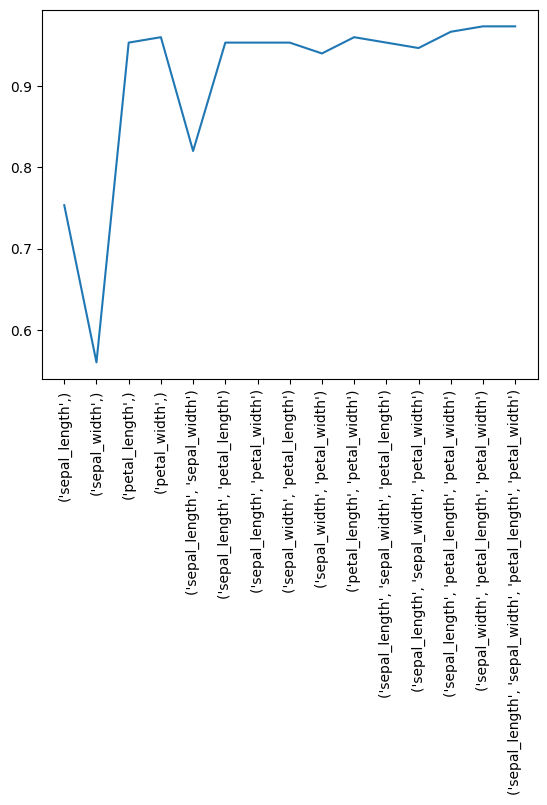

In [ ]:
import matplotlib.pyplot as plt

plt.plot([str(k) for k in metric_df['feature_names']],metric_df['avg_score'])
plt.xticks(rotation=90)
plt.show()

###2

In [ ]:
#regression example


df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape)
print(X_test.shape)

In [ ]:
X_train.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
42    0.14150   0.0   6.91     0  0.448  6.169   6.6  5.7209    3  233   
58    0.15445  25.0   5.13     0  0.453  6.145  29.2  7.8148    8  284   
385  16.81180   0.0  18.10     0  0.700  5.277  98.1  1.4261   24  666   
78    0.05646   0.0  12.83     0  0.437  6.232  53.7  5.0141    5  398   
424   8.79212   0.0  18.10     0  0.584  5.565  70.6  2.0635   24  666   

     ptratio       b  lstat  
42      17.9  383.37   5.81  
58      19.7  390.68   6.86  
385     20.2  396.90  30.81  
78      18.7  386.40  12.34  
424     20.2    3.65  17.16

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# baseline model
import numpy as np
from sklearn.metrics import r2_score
model = LinearRegression()


print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


In [ ]:
lr = LinearRegression()

exh = EFS(lr, max_features=13, scoring='r2', cv=10, print_progress=True,n_jobs=-1)

sel = exh.fit(X_train, y_train)

Features: 8191/8191

In [ ]:
sel.best_score_

In [ ]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [ ]:
metric_df = pd.DataFrame.from_dict(sel.get_metric_dict()).T
metric_df

feature_idx  \
0                                           (0,)   
1                                           (1,)   
2                                           (2,)   
3                                           (3,)   
4                                           (4,)   
...                                          ...   
8186     (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
8187     (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
8188     (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
8189     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
8190  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                              cv_scores avg_score  \
0     [0.03941987916919121, 0.12695789031653215, -0....  0.129009   
1     [0.14236716209182765, -0.10598329567838705, 0....  0.100963   
2     [0.4055276765549378, 0.0029283993633670846, -0...  0.210465   
3     [-0.07110886674980432, -0.08269807310551558, 0... -0.025663   
4     [0.18869831316675012, 0.03113193162308736, 0.0...   0.17746   
...                                                 ...       ...   
8186  [0.8791441026861512, 0.5762263847142651, 0.435...  0.679213   
8187  [0.8731761731752514, 0.5384374917854688, 0.458...  0.679018   
8188  [0.8494627278072391, 0.5454006150975992, 0.444...   0.66547   
8189  [0.8358451877451423, 0.5448662375728608, 0.449...  0.670075   
8190  [0.8674059553865394, 0.5385295808629293, 0.458...  0.677417   

                                   feature_names  ci_bound   std_dev   std_err  
0                                           (0,)  0.064226  0.086475  0.028825  
1                                           (1,)  0.076751  0.103339  0.034446  
2                                           (2,)  0.139709  0.188107  0.062702  
3                                           (3,)  0.055426  0.074627  0.024876  
4                                           (4,)  0.114827  0.154605  0.051535  
...                                          ...       ...       ...       ...  
8186     (0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.096133  0.129436  0.043145  
8187     (0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.098986  0.133276  0.044425  
8188     (0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.099036  0.133343  0.044448  
8189     (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.094633  0.127415  0.042472  
8190  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.098114  0.132102  0.044034  

[8191 rows x 7 columns]

In [ ]:
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

In [ ]:
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

In [ ]:
metric_df.sort_values('adjusted_r2',ascending=False)

feature_idx  \
7975     (0, 1, 4, 5, 7, 8, 9, 10, 11, 12)   
7408         (0, 1, 4, 5, 7, 8, 9, 10, 12)   
8141  (0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)   
8150  (0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)   
8153  (0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
...                                    ...   
53                                 (3, 11)   
11                                   (11,)   
49                                  (3, 7)   
7                                     (7,)   
3                                     (3,)   

                                              cv_scores avg_score  \
7975  [0.8855189158291968, 0.5742220049707852, 0.437...  0.682799   
7408  [0.8717831363927702, 0.5819307800982585, 0.462...  0.680483   
8141  [0.8792702841985804, 0.5752245789381255, 0.438...  0.681125   
8150  [0.8734082301119794, 0.5381382515761789, 0.461...  0.680994   
8153  [0.8853169531726773, 0.5751761822045904, 0.434...  0.680914   
...                                                 ...       ...   
53    [0.07227421305699011, -0.026141441832760126, 0...  0.073485   
11    [0.1200629474726852, 0.03143835749752166, -0.0...  0.068712   
49    [-0.0371219722713414, -0.1671760395427997, 0.0...  0.057453   
7     [0.004822573124353857, -0.09518844023749029, -...  0.038815   
3     [-0.07110886674980432, -0.08269807310551558, 0... -0.025663   

                             feature_names  ci_bound   std_dev   std_err  \
7975     (0, 1, 4, 5, 7, 8, 9, 10, 11, 12)  0.096995  0.130595  0.043532   
7408         (0, 1, 4, 5, 7, 8, 9, 10, 12)  0.090811  0.122269  0.040756   
8141  (0, 1, 2, 4, 5, 7, 8, 9, 10, 11, 12)  0.096068  0.129348  0.043116   
8150  (0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)  0.098795  0.133019   0.04434   
8153  (0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.097075  0.130703  0.043568   
...                                    ...       ...       ...       ...   
53                                 (3, 11)  0.069934   0.09416  0.031387   
11                                   (11,)  0.071116  0.095752  0.031917   
49                                  (3, 7)   0.09446  0.127183  0.042394   
7                                     (7,)  0.066813  0.089958  0.029986   
3                                     (3,)  0.055426  0.074627  0.024876   

      observations  num_features adjusted_r2  
7975           404            10    0.674728  
7408           404             9    0.673185  
8141           404            11    0.672177  
8150           404            11    0.672043  
8153           404            11     0.67196  
...            ...           ...         ...  
53             404             2    0.068864  
11             404             1    0.066396  
49             404             2    0.052752  
7              404             1    0.036424  
3              404             1   -0.028215  

[8191 rows x 10 columns]

In [ ]:
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [ ]:
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124483


In [ ]:
# https://colab.research.google.com/drive/12tCzP94zFG2BRduACucn5Q_OcX1TUKY3#scrollTo=hW5rUr2tXzUW
# NVIDIA just made Pandas 150x faster with zero code changes.

# How?

# All you have to do is:
# %load_ext cudf.pandas
# import pandas as pd

+ This technique can only work with less no of columns due to its time complexity, training lot of models exponentially for each column is computationaly heavy

+ to solve that problem, we can use
  1. Sequential backward selection/elimination
  2. forward selection

##Sequential backward selection/elimination

What we do in this technique:

data = f1, f2, f3, f4.. fn

1. we train model using all data
2. we'll remove 1 column each type & train model with the remaining features

   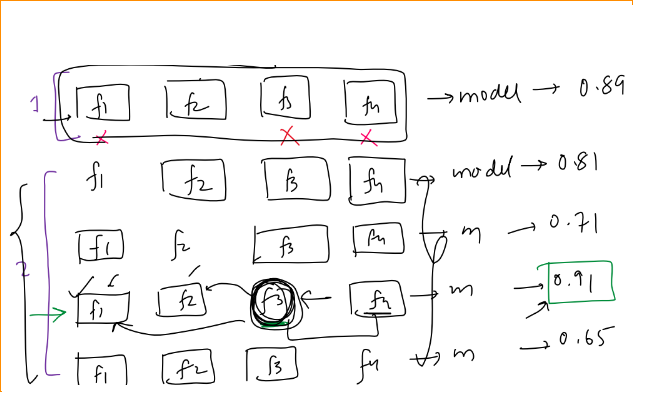

  3. by looking at the accuracy, we can conclude that at this point removing f3 is a better choice

  4. then we'll remove 1 more column again & train ml model

  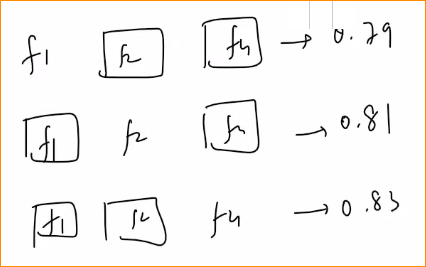

  5. so we'll remove f4 at this time

  6. repeating the same process again:

  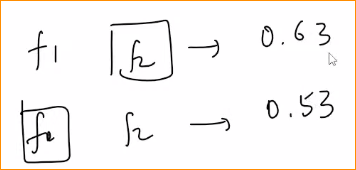

  7. now we'll remove f1 & we're left with f2


+ now we'll have accuracy of all iterations of removing columns on the basis of accuracy above:

  - f1,f2,f3,f4: 0.89
  - f1,f2,f4: 0.91
  - f1,f2: 0.83
  - f2: 0.63

+ we'll compare in above 4 we got "f1,f2,f4" as best featues with maximum accuracy

+ so we'll train models on those features for predictions

+ comparitvly its faster then exhaustive technique becoz for every feature we'll making 1 model unlike exhaustive where it'll grow exponentially (2^n - 1)




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)

(404, 13)


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

#baseline model including all features
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


In [ ]:
lr = LinearRegression()

# perform backward elimination
#k_features = is the best no of features it could be 5, 4, 3 depending upon data
#forward = True is forward selection & false is backward elimination

sfs = SFS(lr, k_features='best', forward=False, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [ ]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [ ]:
#using adjusted r2 score bcoz no of columns are more so we cant rely on r2 score

def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

feature_idx  \
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)   
11        (0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)   
10           (0, 1, 4, 5, 7, 8, 9, 10, 11, 12)   
9                (0, 1, 4, 5, 7, 8, 9, 10, 12)   
8                   (0, 1, 4, 5, 7, 8, 10, 12)   
7                      (0, 1, 4, 5, 7, 10, 12)   
6                         (1, 4, 5, 7, 10, 12)   
5                            (4, 5, 7, 10, 12)   
4                               (5, 7, 10, 12)   
3                                  (5, 10, 12)   
2                                      (5, 12)   
1                                        (12,)   

                                            cv_scores avg_score  \
13  [0.7535027170817177, 0.6920238509138776, 0.682...  0.702512   
12  [0.7532855958710695, 0.6944570477695304, 0.693...   0.70581   
11  [0.7547108925568492, 0.6959627893665097, 0.701...  0.708109   
10  [0.7769593921905562, 0.6884741223718953, 0.702...  0.710033   
9   [0.7706104220711025, 0.6854023389684323, 0.690...  0.704324   
8   [0.7681719744800458, 0.6822126526818693, 0.670...  0.697727   
7   [0.7671638009750724, 0.6812300799626649, 0.661...  0.692234   
6   [0.7519120213497091, 0.6756087674652564, 0.646...  0.686004   
5   [0.7525552802357769, 0.6665033988504306, 0.639...  0.681065   
4   [0.7384743962575442, 0.6401188507668829, 0.587...  0.662544   
3   [0.7215896884753016, 0.6288372046797153, 0.633...  0.661012   
2   [0.6330856272904802, 0.5779812120755249, 0.586...  0.613259   
1   [0.5472998394577442, 0.49002001493399727, 0.53...  0.538451   

                                 feature_names  ci_bound   std_dev   std_err  \
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.038207  0.029727  0.014863   
12     (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)  0.035641   0.02773  0.013865   
11        (0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)  0.035367  0.027516  0.013758   
10           (0, 1, 4, 5, 7, 8, 9, 10, 11, 12)  0.046075  0.035848  0.017924   
9                (0, 1, 4, 5, 7, 8, 9, 10, 12)  0.046449  0.036139  0.018069   
8                   (0, 1, 4, 5, 7, 8, 10, 12)   0.04882  0.037984  0.018992   
7                      (0, 1, 4, 5, 7, 10, 12)  0.051644  0.040181   0.02009   
6                         (1, 4, 5, 7, 10, 12)  0.046845  0.036447  0.018224   
5                            (4, 5, 7, 10, 12)  0.051233  0.039861  0.019931   
4                               (5, 7, 10, 12)  0.063384  0.049315  0.024658   
3                                  (5, 10, 12)   0.04259  0.033136  0.016568   
2                                      (5, 12)  0.034066  0.026505  0.013252   
1                                        (12,)  0.032755  0.025485  0.012742   

    observations  num_features adjusted_r2  
13           404            13    0.692596  
12           404            12    0.696781  
11           404            11    0.699918  
10           404            10    0.702654  
9            404             9     0.69757  
8            404             8    0.691605  
7            404             7    0.686794  
6            404             6    0.681258  
5            404             5    0.677058  
4            404             4    0.659161  
3            404             3     0.65847  
2            404             2     0.61133  
1            404             1    0.537303

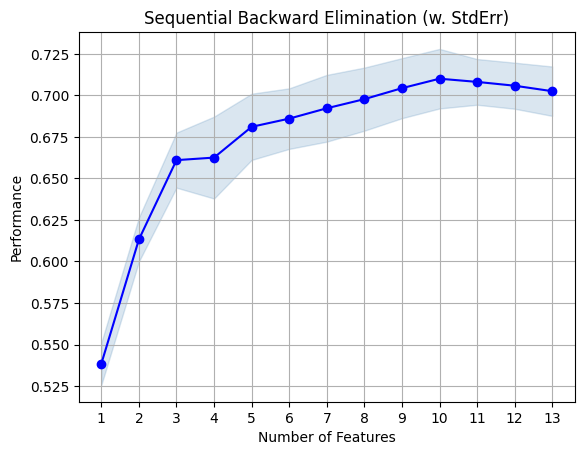

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124483


In [ ]:
X_train_sel.shape

(404, 10)

**Disadvantage**

+ In exhaustive we were trying out all combinations but in backward selection we're only keeping the best & removing others.

+ This way we can miss the best as its not taking combinations of features together like f3, f4 combo could be best but since we removed it on the basis of individual accuracy

##Sequential Forward Selection

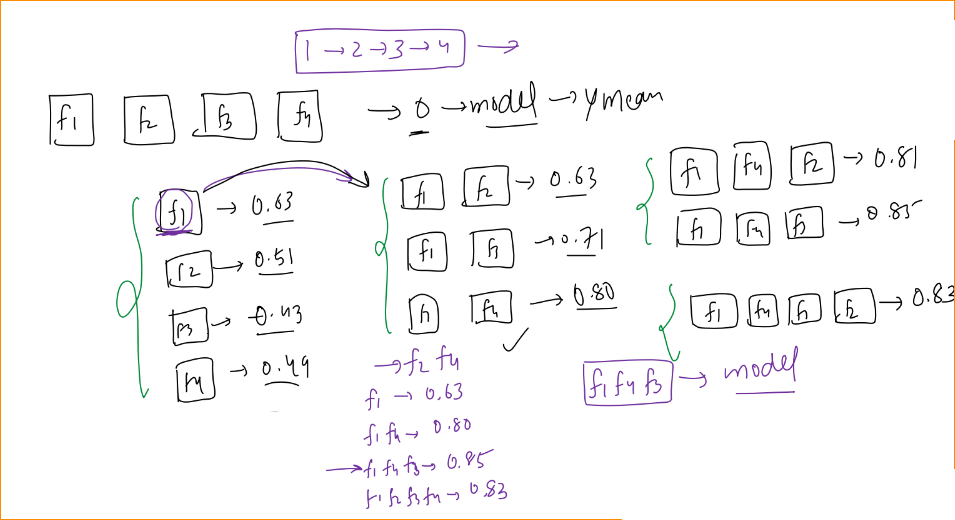

+ Lets say we havr 4 features

+ At first we'll build a model without taking any input feature so it'll be predicting on the basis of mean

+ then we'll build model for each, find accuracy & select the feature with best acuracy --> f1

+ then we'll build models using the selected column with the rest of the columns in combination --> f1,f3

+ then we do the same proces again.. f1,f4,f3

+ then we do the same process again.. and we found that accuracy for f1,f3,f4 is highest

+ Its called forward selection bcoz we keep adding 1-1 feature

+ we're building the same no of models as in backward elimination:

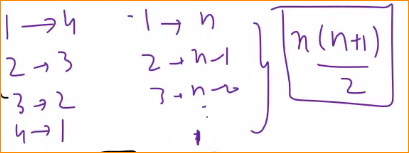

+ summary

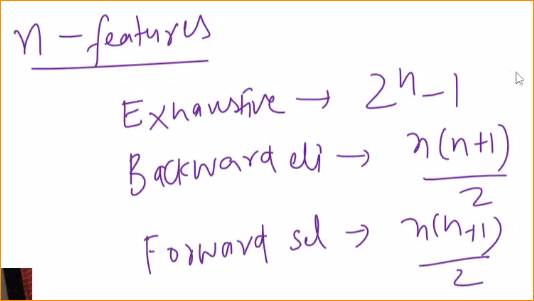

###code implimentation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

# separate the target variable
X = data.drop("medv", axis=1)
y = data['medv']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)

(404, 13)


In [ ]:
#scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score

#baseline model including all features
model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test, y_test, cv=5, scoring='r2')))

training 0.7025123301096212
testing 0.6514899901155402


In [ ]:
lr = LinearRegression()

# perform backward elimination
#k_features = is the best no of features it could be 5, 4, 3 depending upon data
#forward = True is forward selection & false is backward elimination

sfs = SFS(lr, k_features='best', forward=True, floating=False, scoring='r2',cv=5)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 13),
                          scoring='r2')

In [ ]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [ ]:
#using adjusted r2 score bcoz no of columns are more so we cant rely on r2 score

def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

metric_df = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

feature_idx  \
1                                        (12,)   
2                                      (5, 12)   
3                                  (5, 10, 12)   
4                              (5, 10, 11, 12)   
5                           (5, 7, 10, 11, 12)   
6                        (4, 5, 7, 10, 11, 12)   
7                     (1, 4, 5, 7, 10, 11, 12)   
8                  (0, 1, 4, 5, 7, 10, 11, 12)   
9               (0, 1, 4, 5, 7, 8, 10, 11, 12)   
10           (0, 1, 4, 5, 7, 8, 9, 10, 11, 12)   
11        (0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)   
12     (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)   

                                            cv_scores avg_score  \
1   [0.5472998394577442, 0.49002001493399727, 0.53...  0.538451   
2   [0.6330856272904802, 0.5779812120755249, 0.586...  0.613259   
3   [0.7215896884753016, 0.6288372046797153, 0.633...  0.661012   
4   [0.7258772165486241, 0.6342604286872173, 0.655...  0.667383   
5   [0.7440756174774326, 0.6473449858158778, 0.614...  0.671496   
6   [0.7554472741494642, 0.6695521143038103, 0.653...   0.68562   
7   [0.754884343390746, 0.6798073590310515, 0.6621...    0.6913   
8   [0.7678201537729974, 0.6827004362205137, 0.671...  0.695442   
9   [0.7746648196407366, 0.6850585456872307, 0.683...  0.703763   
10  [0.7769593921905562, 0.6884741223718953, 0.702...  0.710033   
11  [0.7547108925568492, 0.6959627893665097, 0.701...  0.708109   
12  [0.7532855958710695, 0.6944570477695304, 0.693...   0.70581   
13  [0.7535027170817177, 0.6920238509138776, 0.682...  0.702512   

                                 feature_names  ci_bound   std_dev   std_err  \
1                                        (12,)  0.032755  0.025485  0.012742   
2                                      (5, 12)  0.034066  0.026505  0.013252   
3                                  (5, 10, 12)   0.04259  0.033136  0.016568   
4                              (5, 10, 11, 12)  0.039611  0.030819   0.01541   
5                           (5, 7, 10, 11, 12)  0.055057  0.042836  0.021418   
6                        (4, 5, 7, 10, 11, 12)  0.047626  0.037054  0.018527   
7                     (1, 4, 5, 7, 10, 11, 12)  0.042762   0.03327  0.016635   
8                  (0, 1, 4, 5, 7, 10, 11, 12)  0.048774  0.037948  0.018974   
9               (0, 1, 4, 5, 7, 8, 10, 11, 12)   0.04762   0.03705  0.018525   
10           (0, 1, 4, 5, 7, 8, 9, 10, 11, 12)  0.046075  0.035848  0.017924   
11        (0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)  0.035367  0.027516  0.013758   
12     (0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)  0.035641   0.02773  0.013865   
13  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)  0.038207  0.029727  0.014863   

    observations  num_features adjusted_r2  
1            404             1    0.537303  
2            404             2     0.61133  
3            404             3     0.65847  
4            404             4    0.664048  
5            404             5    0.667369  
6            404             6    0.680869  
7            404             7    0.685844  
8            404             8    0.689274  
9            404             9    0.696996  
10           404            10    0.702654  
11           404            11    0.699918  
12           404            12    0.696781  
13           404            13    0.692596

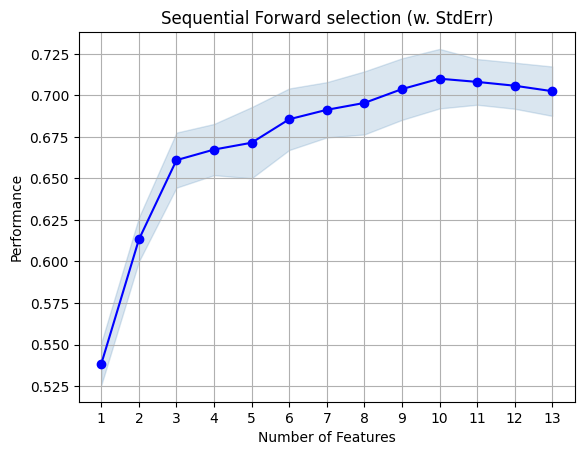

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err',)

plt.title('Sequential Forward selection (w. StdErr)')
plt.grid()
plt.show()

In [ ]:
X_train_sel = sfs.transform(X_train)
X_test_sel = sfs.transform(X_test)

model = LinearRegression()

print("training",np.mean(cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')))
print("testing",np.mean(cross_val_score(model, X_test_sel, y_test, cv=5, scoring='r2')))

training 0.7100327839218561
testing 0.7205819296124483


In [ ]:
X_train_sel.shape

(404, 10)

### Task

## `Task` Select best features from from Wine Quality dataset.

* Data Link : https://www.kaggle.com/datasets/rajyellow46/wine-quality

* Drive link : https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv

Note : Follow approach from Feature Selection Session - 2

##How to decide b/w Forward & Backward?

+ If we want 500 best features out of 563 then we should use backward bcoz in this technique we start from taking all columns & keep eliminating 1 feature 1 by 1

+ If we want 50 best features out of 563 then we should use forward bcoz we're starting from 0 & selecting 1-1 feature 1 by 1 so we'll reach 50 earlier then backward

+ if we want to select best columns with no specifications then we can try any 1 of these 2

+ if data is smaller then apply exhaustive as its best or first apply forward/backward technique, when features are less then apply exhaustive

##Advantages & Disadvanteges of wrapper method

**Advantages**
1. Accuracy is better then filter method
2. filter method biggest drawback was "Interaction with feature", This is covered in wrapper method

**Disadvantages**
1. computationally heavy
2. risk of overfitting bcoz we train with more no. of columns
3. Its model specific since in wrapper method we're using ml model to select features like in above example we used LR & Its best for LR model however when we use Decision Tree then the same approach of selecting features using LR may not be the best

##Recursive Feature Elimination(RFE)

+ Lets say we have 4 features & we have to perform feature selection & find the best festures using RFE

+ we use a model which has coeff_ or feature_importance_attribute

+ we'll remove columns with lowest feature_importance

+ repeat the same process again & again & we'll get the most important feature at the end

##manual RFE code implimentation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [ ]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [ ]:
X.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X,y)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([0.0835476 , 0.01975096, 0.48842545, 0.408276  ])

In [ ]:
X.drop(columns='sepal_width',inplace=True)
X.head()

sepal_length  petal_length  petal_width
0           5.1           1.4          0.2
1           4.9           1.4          0.2
2           4.7           1.3          0.2
3           4.6           1.5          0.2
4           5.0           1.4          0.2

In [ ]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.22860026, 0.37657093, 0.39482881])

In [ ]:
X.drop(columns='sepal_length',inplace=True)
X.head()

petal_length  petal_width
0           1.4          0.2
1           1.4          0.2
2           1.3          0.2
3           1.5          0.2
4           1.4          0.2

In [ ]:
rf = RandomForestClassifier()
rf.fit(X,y)

rf.feature_importances_

array([0.49909192, 0.50090808])

In [ ]:
X.drop(columns='petal_length',inplace=True)
X.head()

petal_width
0          0.2
1          0.2
2          0.2
3          0.2
4          0.2

##RFE using Sklearn

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load iris dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
df = pd.read_csv(url)

# Separate features and target variable
X = df.drop("species", axis=1)
y = df["species"]

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X, y)

# Print the ranking
ranking = rfe.ranking_
print("Feature ranking:")

for i, feature in enumerate(X.columns):
    print(f"{feature}: {ranking[i]}")


Feature ranking:
sepal_length: 3
sepal_width: 4
petal_length: 2
petal_width: 1


###RFE-CV

**What is CV**
+ cross-validation in machine learning is like a practice test before the real exam.

Imagine you're learning to solve math problems, and you've got a bunch of exercises to practice. Now, instead of just solving all the exercises once and hoping you've learned everything, you might want to check how well you're doing.

+ Here's what you'd do:

+ Practice & Test: You'd split your exercises into smaller groups. You'd solve some problems and keep some aside for testing later.

+ Check Answers: You'd solve the problems in the practice set, and then check your answers using the problems you kept aside for testing. This helps you understand how well you've learned to solve those problems.

+ Adjust and Repeat: If you didn't do well in the test problems, you'd go back, practice more, and then test yourself again. You'd repeat this process until you're confident that you're doing well on problems you haven't seen before.

+ Cross-validation works similarly for a machine learning model. Instead of just training the model once and hoping it's good, you split your data into parts. You train the model on some parts and check how well it predicts the outcomes on the other parts. This helps make sure the model is learning properly and can handle new, unseen data well. If it doesn't do well, you tweak it and check again until it performs reliably.

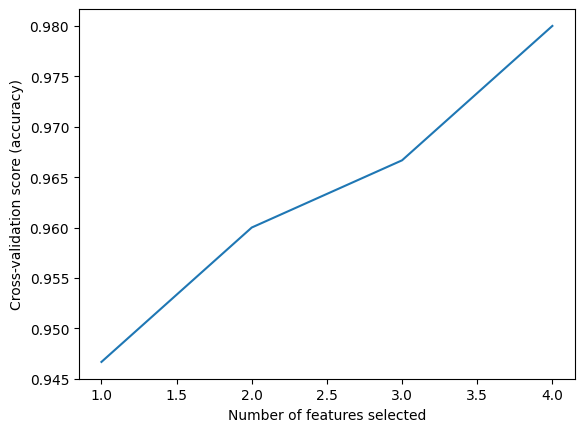

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create the RFE object and fit it
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()


#Embeded method


+ It solves the drawbacks of "feature interaction" in Filter method & "computational complexity" in Wrapper method

+ In embeded method, feature selection becomes the part of model building.

+ At the time of model training, it also calculates "feature importance"

+ Its computationaly efficient then wrapper methods

+ Any ml algorithm which has co-efficient & feature_importance_ attributes available, can be used for this operation

+ Any machine learning algorithm that provides access to coefficients or feature importance attributes can be used effectively for feature selection within embedded methods.

  Here's why these attributes matter:

+ Algorithms like linear regression, logistic regression, and support vector machines provide coefficients. These coefficients indicate the weight or importance assigned to each feature in the model.
  Feature Importance:

+ Other algorithms such as decision trees, random forests, gradient boosting machines, and certain ensemble methods offer a feature importance score. This score signifies how much each feature contributes to the model's predictive ability.
  
+ In embedded methods, these attributes—whether coefficients or feature importance scores—are utilized to identify and select the most influential features for the model. By analyzing these attributes, the method automatically discerns which features are more impactful or contribute significantly to predicting the target variable.


## Linear Regression

+ How Linear Regression algorithm can be used to calculate "Feature Importance" which is nothinh but the weightage or coefficients (B1 + B2.. etc)

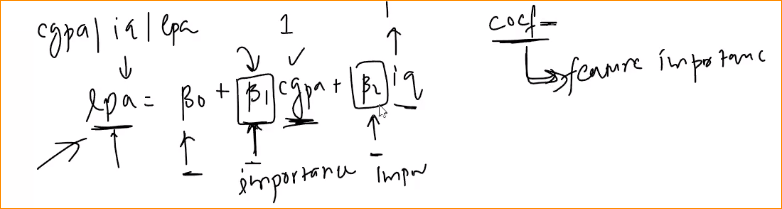

+ suppose we have above data of cgpa, iq & lpa is the target value
+ in order to make a linear regression model, we have to find a mathematical equation lpa = b0 + b1 * cgpa + b2 * iq
+ b1 & b2 are coefficients which tells the weightage, if we increase cgpa by 1 ten how lpa will increase keeping everything else as constant

+ b1 & b2 can be treated as "feature importance" but we need to be very careful bcoz some assumptions like below screenshot must be true otherwise they are not reliable

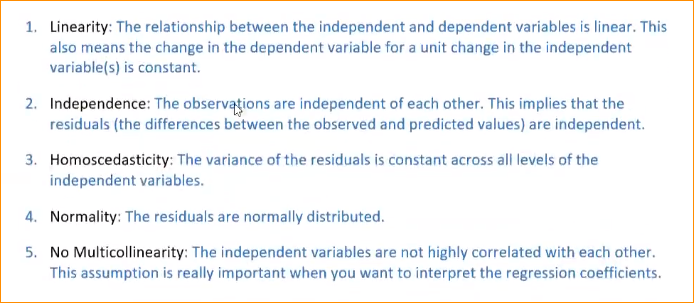





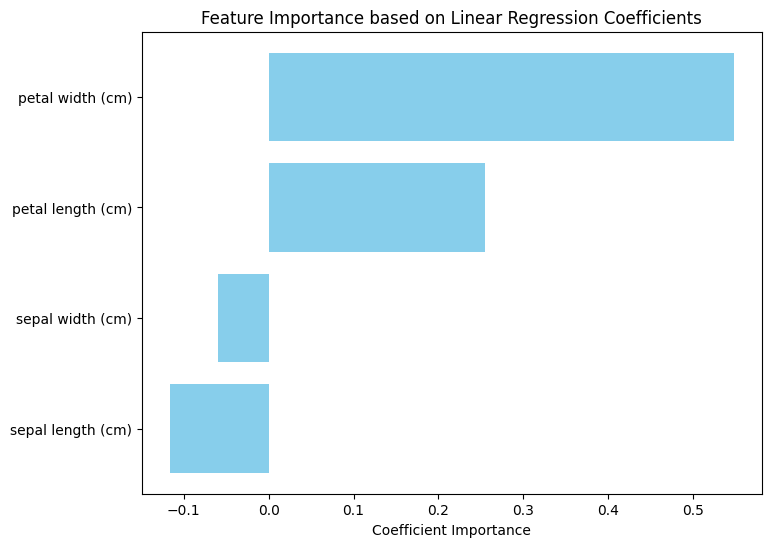

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='species')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients as feature importance
feature_importance = model.coef_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': feature_importance.flatten()})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Plot a bar chart for feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Importance')
plt.title('Feature Importance based on Linear Regression Coefficients')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()


## Regularized model (Regularization)

+ regularized models are linear models like linear regression
+ if linear regression is overfitting then we can use regularized models to fix it
+ mostly lasso regression is used for feature selection

###feature selection using lasso

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [ ]:
X_train.shape

(614, 8)

In [ ]:
X_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
663            9      145             80             46      130  37.9   
712           10      129             62             36        0  41.2   
161            7      102             74             40      105  37.2   
509            8      120             78              0        0  25.0   
305            2      120             76             37      105  39.7   

     DiabetesPedigreeFunction  Age  
663                     0.637   40  
712                     0.441   38  
161                     0.204   45  
509                     0.409   64  
305                     0.215   29

In [ ]:
from sklearn.preprocessing import StandardScaler

cols = X_train.columns

#scaling feature values to bring them into same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,columns=cols)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=cols)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)

lasso.fit(X_train_scaled, y_train)

Lasso(alpha=0.01)

In [ ]:
lasso.coef_

array([ 6.26290474e-02,  1.85968700e-01, -3.50258983e-02, -0.00000000e+00,
       -1.62558777e-04,  8.51781764e-02,  2.83810683e-02,  1.84611338e-02])

<Axes: >

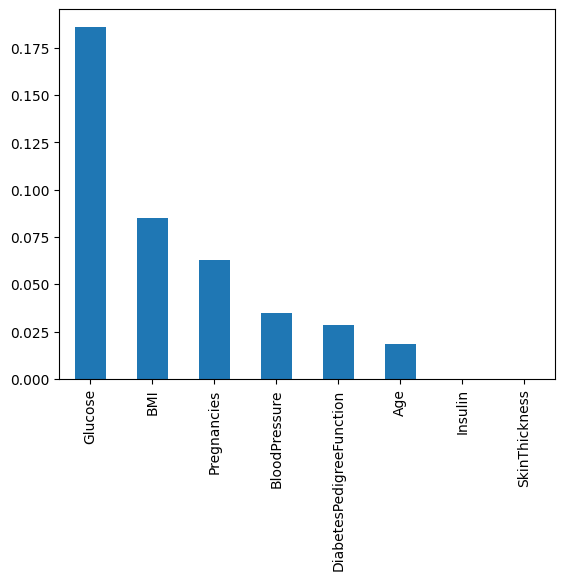

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = pd.Series(np.abs(lasso.coef_),index=cols)

x.sort_values(ascending=False).plot(kind='bar')

##Tree based models

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [ ]:
X_train.head()

In [ ]:
from pandas.core.common import random_state
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

#dt.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf.feature_importances_

array([0.09123747, 0.24373651, 0.09181293, 0.06782143, 0.08321639,
       0.16596331, 0.12511326, 0.13109871])

<Axes: >

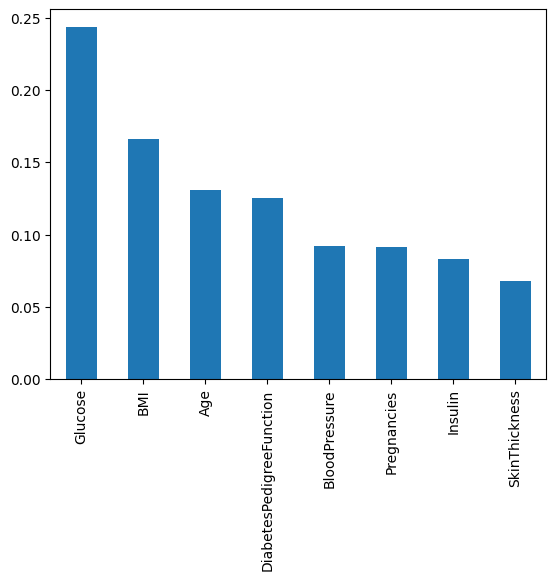

In [ ]:
x = pd.Series(np.abs(rf.feature_importances_),index=cols)
x.sort_values(ascending=False).plot(kind='bar')

##Select from model option in sklearn to apply embeded technique of feature selection

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1],df.iloc[:,-1],test_size=0.2,random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(model, threshold=0.1)

In [ ]:
sfm.fit(X_train, y_train)

SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.1)

In [ ]:
sfm.get_support(indices=True)

array([1, 2, 5, 6, 7])

In [ ]:
sfm.feature_names_in_[sfm.get_support(indices=True)]

array(['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction',
       'Age'], dtype=object)

In [ ]:
X_train_trans = sfm.transform(X_train)

X_train_trans = pd.DataFrame(X_train_trans,columns=sfm.feature_names_in_[sfm.get_support(indices=True)])

X_train_trans

Glucose  BloodPressure   BMI  DiabetesPedigreeFunction   Age
0      145.0           80.0  37.9                     0.637  40.0
1      129.0           62.0  41.2                     0.441  38.0
2      102.0           74.0  37.2                     0.204  45.0
3      120.0           78.0  25.0                     0.409  64.0
4      120.0           76.0  39.7                     0.215  29.0
..       ...            ...   ...                       ...   ...
609    157.0           74.0  39.4                     0.134  30.0
610    187.0           50.0  33.9                     0.826  34.0
611    126.0           90.0  43.4                     0.583  42.0
612    171.0           72.0  43.6                     0.479  26.0
613    102.0           76.0  32.9                     0.665  46.0

[614 rows x 5 columns]

##Advantage & Disadvantage of Embeded Techniques

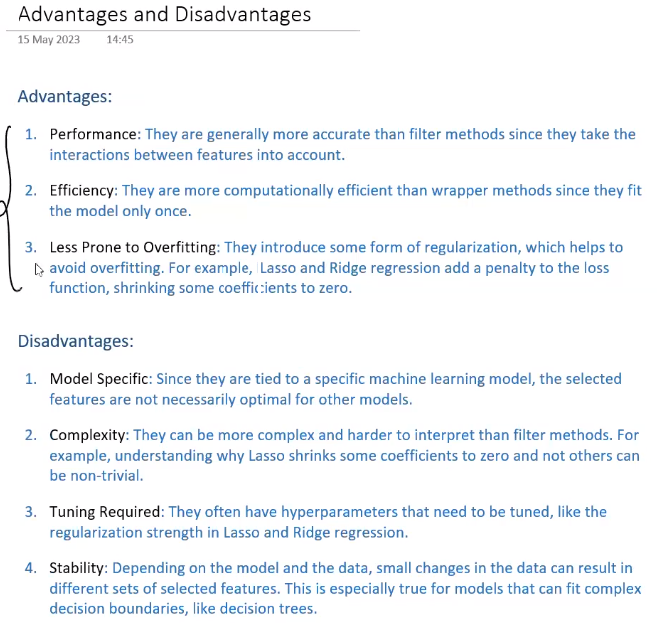

#Cheatsheet

+ Filter Methods:
  1. Variance Threshold: Removes all features whose variance doesn’t meet a
  certain threshold. Use this when you have many features and you want to
  remove those that are constants or near constants.


  2. Correlation Coefficient: Finds the correlation between each pair of
  features. Highly correlated features can be removed since they contain
  similar information. Use this when you suspect that some features are
  highly correlated.

  3. Chi-Square Test: This statistical test is used to determine if there’s a
  significant association between two variables. It's commonly used for
  categorical variables. Use this when you have categorical features and you
  want to find their dependency with the target variable.

  4. Mutual Information: Measures the dependency between two variables.
  It's a more general form of the correlation coefficient and can capture
  non-linear dependencies. Use this when you want to measure both linear
  and non-linear dependencies between features and the target variable.


  5. ANOVA (Analysis of Variance): ANOVA is a statistical test that stands for "Analysis of Variance". ANOVA tests the impact of one or more factors by comparing the means of different samples. Use this when you have one or
  more categorical independent variables and a continuous dependent
  variable.

+ Wrapper Methods:
  1. Recursive Feature Elimination (RFE): Recursively removes features, builds a model using the remaining attributes, and calculates model accuracy. It uses model accuracy to identify which attributes contribute the most. Use this when you want to leverage the model to identify the best features.

  2. Sequential Feature Selection (SFS): Adds or removes one feature at the
  time based on the classifier performance until a feature subset of the
  desired size k is reached. Use this when computational cost is not an issue
  and you want to find the optimal feature subset.

  3. Exhaustive Feature Selection: This is a brute-force evaluation of each
feature subset. This method, as the name suggests, tries out all possible
combinations of variables and returns the best subset. Use this when the
number of features is small, as it can be computationally expensive.


+ Embedded Methods:
  1. Lasso Regression: Lasso (Least Absolute Shrinkage and Selection Operator)
  is a regression analysis method that performs both variable selection and
  regularization. Use this when you want to create a simple and
  interpretable model.
  
  2. Ridge Regression: Ridge regression is a method used to analyze multiple
  regression data that suffer from multicollinearity. Unlike Lasso, it doesn't lead to feature selection but rather minimizes the complexity of the model.


 3. Elastic Net: This method is a combination of Lasso and Ridge. It
  incorporates penalties from both methods and is particularly useful when
  there are multiple correlated features.


  4. Random Forest Importance: Random forests provide a straightforward
  method for feature selection, namely mean decrease impurity (MDI). Use
  this when you want to leverage the power


#Task

+ Try Feature Selection Techniques on different Big Datasets 1 for each
+ Create a Flow Diagram of everything learned so far in drawing book !!
+ complete all regression model related topics before starting new algorithm
+ watch 100 days of ml after that before starting new algorithm